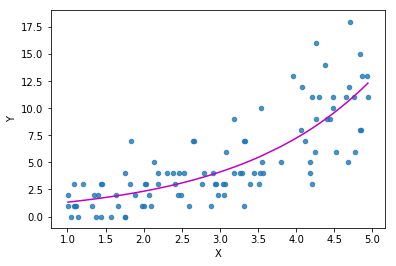

In [4]:
import numpy as np
from numpy.random import uniform, normal, poisson, binomial
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = poisson(mu)

exog, endog = sm.add_constant(x), y

import statsmodels.api as sm
mod = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log))
res = mod.fit()

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

In [1]:
import numpy as np
from numpy.random import uniform, normal, poisson, binomial
from scipy import stats
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

/Users/yuho/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


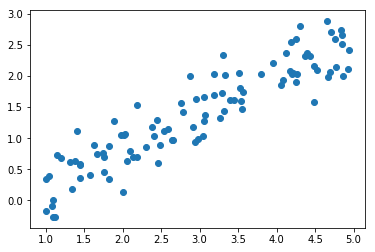

In [4]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.3

x = uniform(1, 5, size=n_sample)
mu = a * x + b
y = normal(mu, sd)

plt.scatter(x, y)

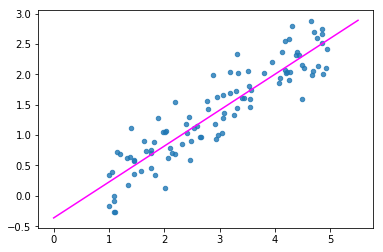

In [8]:
slope, intercept, r_value, p_value, std_err  = stats.linregress(x, y)
xvals = np.array([0, 5.5])
yvals = slope * xvals + intercept

plt.scatter(x, y, s=20, alpha=0.8)
plt.plot(xvals, yvals, color='magenta')
plt.savefig('linear_regression.png')

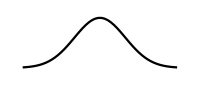

In [47]:
xx = np.linspace(-3,3)

fig, ax = plt.subplots(figsize=(3,1))
ax.plot(xx, stats.norm.pdf(xx), color='k')

ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
ax.tick_params(labelleft="off",left="off") # y軸の削除
ax.set_xticklabels([]) 
plt.box("off")

plt.savefig("normal_dist.png", transparent=True)

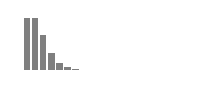

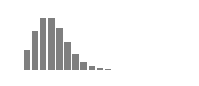

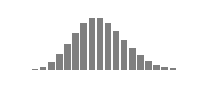

In [64]:
xx = np.arange(1, 20)

for lam in [2, 4, 10]:
    fig, ax = plt.subplots(figsize=(3,1))
    ax.bar(xx, stats.poisson.pmf(xx, mu=lam), color='k', alpha=0.5)

    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    ax.set_xticklabels([]) 
    plt.box("off")

    plt.savefig(f"poisson_dist_lam{lam}.png", transparent=True)

In [20]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = poisson(mu)

In [21]:
y

array([ 2, 11,  7,  5,  3,  4,  8,  6,  3,  0,  1, 13,  3,  2,  6,  1,  7,
        4,  3,  1,  3,  2,  5,  3,  4,  0,  1,  8,  8,  4,  1,  3,  5,  7,
        3,  7,  2,  3,  4, 11,  3,  3, 10, 12,  1,  1, 13,  1,  9,  9, 12,
        3,  1,  2,  3,  1, 13,  4, 16,  4, 10,  6, 18, 11, 11,  0,  2,  0,
        4,  5,  3,  0,  4,  1,  4,  3,  5,  2,  7, 11,  6,  3, 14,  4,  2,
        4,  3, 15,  2,  0,  9,  0,  4,  9,  2,  4, 11,  1,  4,  7])

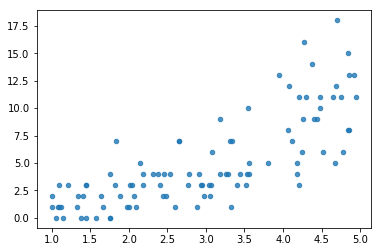

In [23]:
plt.scatter(x, y, s=20, alpha=0.8)
plt.savefig('poisson_data.png')

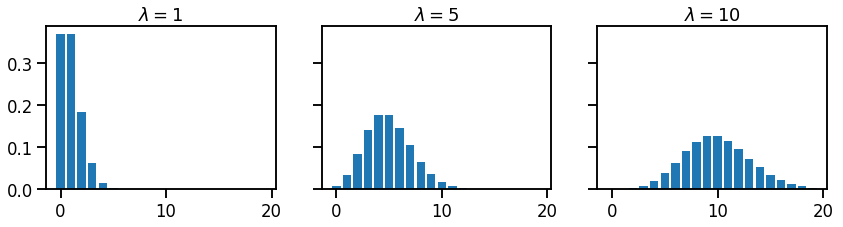

In [31]:
sns.set_context('talk')

fig, axes = plt.subplots(1, 3, figsize=(14, 3), sharey=True)

xx = np.arange(20)
lambdas = [1, 5, 10]

for i, lam in enumerate(lambdas):
    yy = stats.poisson.pmf(xx, lam)
    axes[i].bar(xx, yy)
    axes[i].set_title(r'$\lambda={}$'.format(lam))

plt.savefig('Poisson_distribution.png')

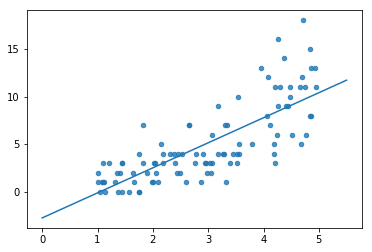

In [5]:
slope, intercept, r_value, p_value, std_err  = stats.linregress(x, y)
xvals = np.array([0, 5.5])
yvals = slope * xvals + intercept

plt.scatter(x, y, s=20, alpha=0.8)
plt.plot(xvals, yvals)

In [32]:
exog = sm.add_constant(x)
endog = y

In [33]:
mod = sm.GLM(endog, exog, family=sm.families.Poisson())
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -213.95
Date:                Tue, 17 Sep 2019   Deviance:                       120.86
Time:                        09:22:33   Pearson chi2:                     115.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2789      0.162     -1.720      0.085      -0.597       0.039
x1             0.5646      0.042     13.508      0.000       0.483       0.647
==============================================================================
"""

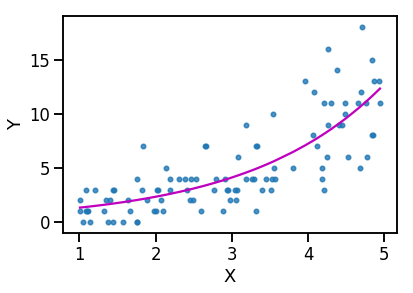

In [44]:
y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('poisson_regression.png')

## Logistic regression

In [30]:
def logistic(x):
    return 1 / (1 + np.exp(-x))


np.random.seed(5)
n_sample = 100
a = 3.0
b = -9.0

x = uniform(1, 5, size=n_sample)
q = logistic(a * x + b)
y = binomial(n=1, p=q)

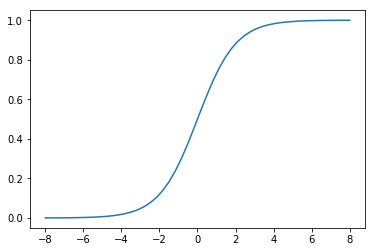

In [31]:
xx = np.linspace(-8, 8)
plt.plot(xx, logistic(xx))

In [40]:
stats.binom(n=1, p=0.8).pmf(1)

0.8

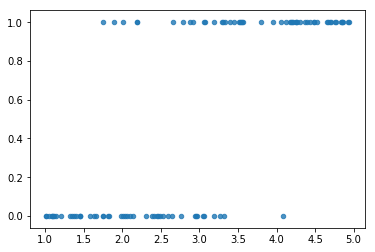

In [33]:
plt.scatter(x, y,  s=20, alpha=0.8)

## custom GLM

xとyは指数関数、誤差は正規分布

In [12]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.8

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = normal(mu, sd)

NameError: name 'endog' is not defined

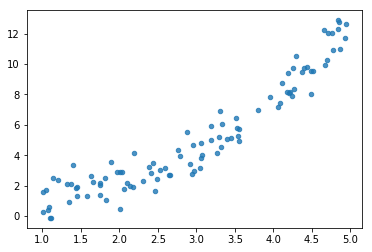

In [13]:
plt.scatter(x, y,  s=20, alpha=0.8)

In [19]:
exog = sm.add_constant(x)
endog = y

mod = sm.GLM(endog, exog, family=sm.families.Gaussian(sm.families.links.log))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   1.51629275199
Method:                          IRLS   Log-Likelihood:                -161.70
Date:                Sun, 22 Sep 2019   Deviance:                       148.60
Time:                        10:28:26   Pearson chi2:                     149.
No. Iterations:                     2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0905      0.326     -9.479      0.000      -3.730      -2.452
x1             2.7766      0.102     27.301      0.000       2.577       2.976
==============================================================================
"""

In [11]:
# 負の二項分布回帰
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.8

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)

In [ ]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.3

x = uniform(1, 5, size=n_sample)
mu = a * x + b
y = normal(mu, sd)

plt.scatter(x, y)